In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [2]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [3]:
%matplotlib inline

import matplotlib as mpl

mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
pd.options.display.float_format = '{:.5f}'.format

In [5]:
df = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Data Visualization\법무부_유학생관리정보 데이터_20220630.csv',encoding = 'cp949')

In [6]:
df

,성별,국적명,체류자격,학교명
0,남,말리,학사과정,학교법인성결대학교
1,남,중국,학사과정,숭실대학교
2,남,방글라데시,학사과정,세종대학교
3,남,미국,학사과정,한국외국어대학교
4,남,중국,학사과정,가천대학교
...,...,...,...,...
173348,남,중국,학사과정,NaN
173349,남,중국,학사과정,NaN
173350,남,우즈베키스탄,학사과정,NaN
173351,여,카자흐스탄,외국어연수생,NaN


In [7]:
df_1 = df.value_counts('체류자격')
df_1 = pd.DataFrame(df_1).reset_index()
df_1

,체류자격,0
0,학사과정,59028
1,대학부설 어학원 연수,56302
2,석사과정,23867
3,박사과정,15271
4,전문학사과정,9813
5,교환학생,8820
6,학술연구기관 특정연구자,231
7,외국어연수생,20
8,(구)교환학생,1


In [8]:
df_1

,체류자격,0
0,학사과정,59028
1,대학부설 어학원 연수,56302
2,석사과정,23867
3,박사과정,15271
4,전문학사과정,9813
5,교환학생,8820
6,학술연구기관 특정연구자,231
7,외국어연수생,20
8,(구)교환학생,1


In [9]:
#sns.set(style="whitegrid", color_codes=True)


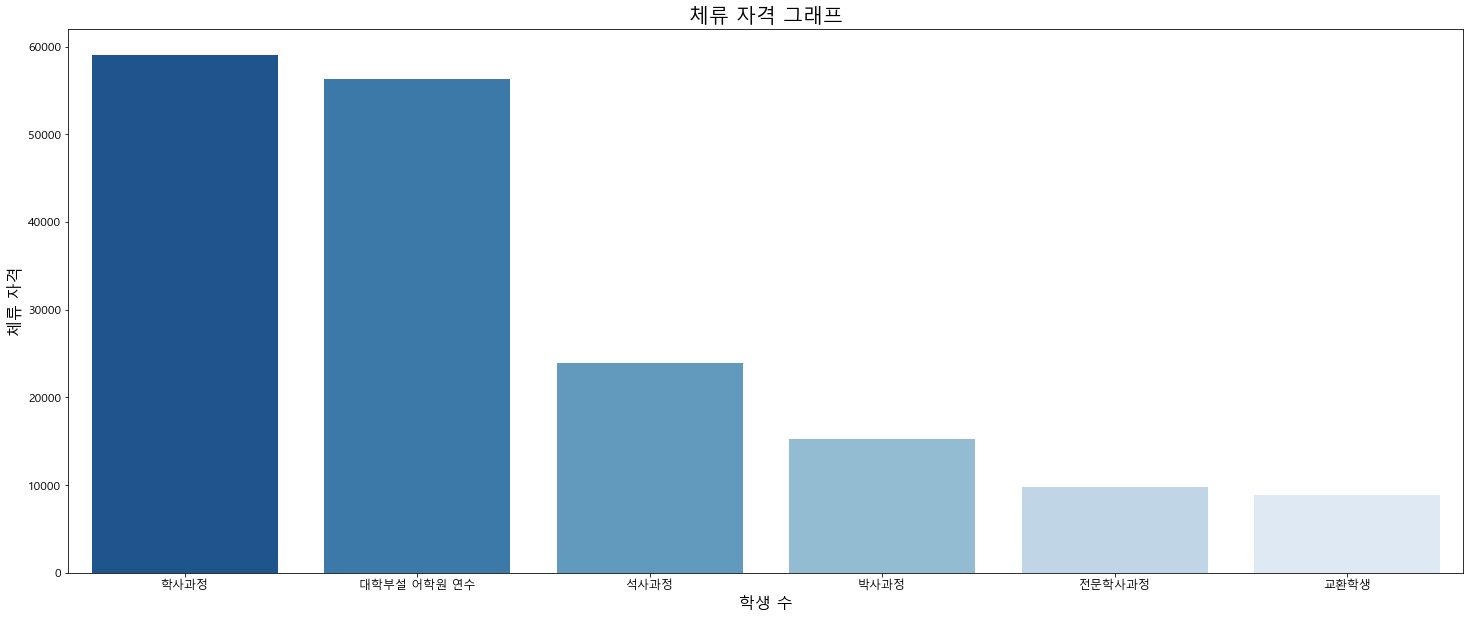

In [10]:
#df_1
plt.figure(figsize=(25,10))
plt.title('체류 자격 그래프', fontsize=20)
sns.barplot(data = df_1[:6], x = '체류자격', y = 0, palette=("Blues_r"))
plt.xlabel('학생 수', fontsize=16)
plt.ylabel('체류 자격', fontsize=16)
plt.show()

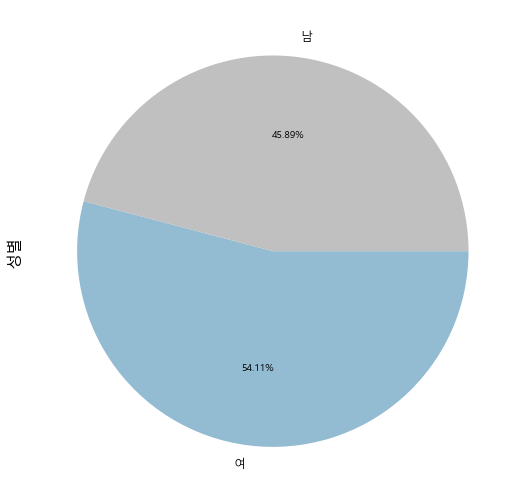

In [11]:
colors = ['#93BBD2','silver']
plt.figure(figsize = (12,9))
df3_sex = df['성별'].value_counts()
df3_sex.plot.pie(autopct='%.2f%%',counterclock=False,colors=colors)
plt.ylabel('성별', fontsize=16)
plt.show()

In [12]:
df.value_counts('학교명').head(10)

학교명
한양대학교       5318
성균관대학교      4212
경희대학교       3700
고려대학교       3444
중앙대학교       3209
(학)연세대학교    2952
동국대학교       2709
건국대학교       2611
명지대학교       2474
가천대학교       2412
dtype: int64

In [13]:
ll = ['한양대학교','성균관대학교','경희대학교','고려대학교','중앙대학교','(학)연세대학교','동국대학교','건국대학교','명지대학교','세종대학교']

In [14]:
#df[df['학교명']]

In [53]:
df_10 = df[(df['학교명'] == '한양대학교') | (df['학교명'] == '성균관대학교') | (df['학교명'] == '경희대학교') | (df['학교명'] == '고려대학교') | (df['학교명'] == '(학)연세대학교') | (df['학교명'] == '동국대학교') | (df['학교명'] == '건국대학교') | (df['학교명'] == '명지대학교') | (df['학교명'] == '세종대학교')]

In [54]:
#df_10.groupby(['학교명','체류자격']).count()
df_100 = pd.crosstab(df_10['학교명'], df_10['체류자격'])
df_100 = df_100.drop(columns=['전문학사과정','학술연구기관 특정연구자'])


In [65]:
df_100 = df_100.sort_values('학사과정',ascending=False)
df_100 = df_100[['학사과정','대학부설 어학원 연수','석사과정','박사과정','교환학생']]

In [67]:
df_100

체류자격,학사과정,대학부설 어학원 연수,석사과정,박사과정,교환학생
학교명,,,,,
한양대학교,2172,969,1236,529,399
성균관대학교,1619,756,917,541,363
경희대학교,1492,1066,877,129,109
명지대학교,1276,742,174,116,149
고려대학교,1198,1074,507,208,435
(학)연세대학교,1016,729,558,228,410
건국대학교,951,1029,338,119,161
세종대학교,839,332,477,406,112
동국대학교,709,948,674,177,151


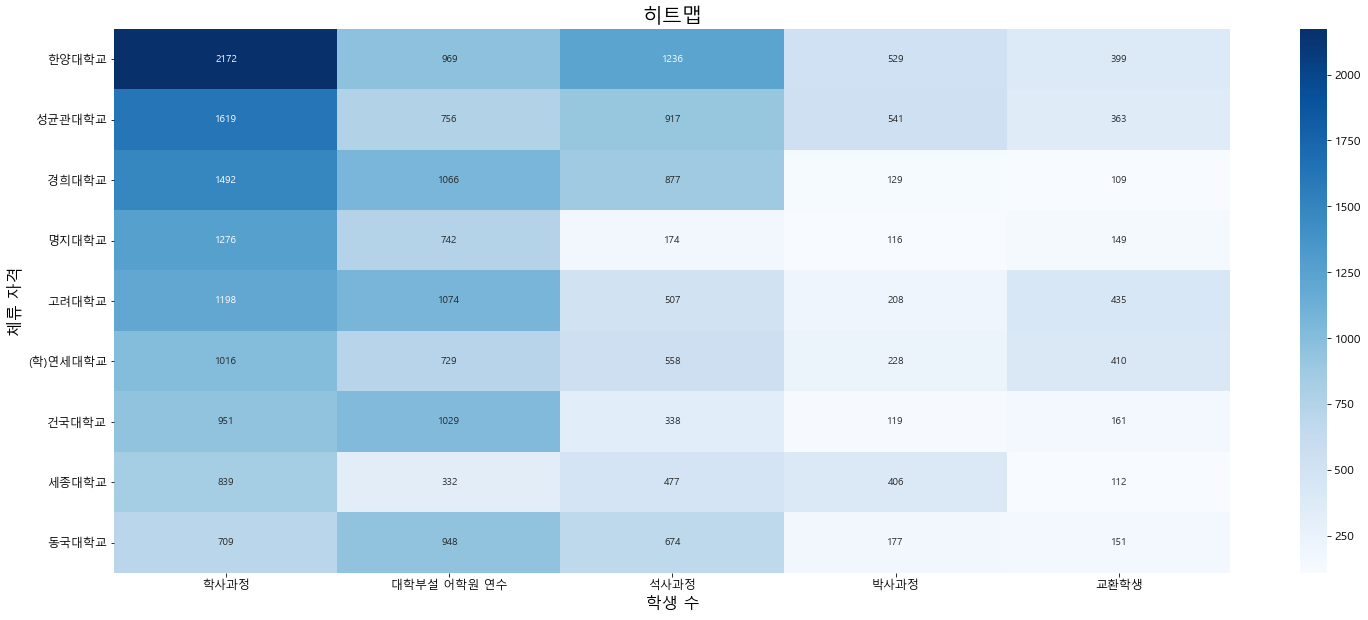

In [68]:
plt.figure(figsize=(25,10))
plt.title('히트맵', fontsize=20)
sns.heatmap(data = df_100,cmap='Blues',annot = True,fmt='g')
plt.xlabel('학생 수', fontsize=16)
plt.ylabel('체류 자격', fontsize=16)
plt.show()

In [20]:
aa = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Data Visualization\국민건강보험공단_건강검진정보_20211229.CSV',encoding = 'cp949')

In [21]:
h = aa[(aa['허리둘레'] < 140) & (aa['허리둘레'] > 50)]
h

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.10000,1.20000,1.50000,...,1.10000,21.00000,27.00000,21.00000,1.00000,0.00000,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.00000,0.80000,0.80000,...,0.50000,18.00000,15.00000,15.00000,1.00000,0.00000,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.00000,0.60000,0.70000,...,0.70000,27.00000,25.00000,7.00000,1.00000,0.00000,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.80000,1.00000,1.00000,...,1.20000,65.00000,97.00000,72.00000,1.00000,0.00000,1,0.00000,0.00000,2021-12-29
4,2020,5,41,2,12,155,50,75.20000,1.50000,1.20000,...,0.70000,18.00000,17.00000,14.00000,1.00000,0.00000,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.00000,0.90000,1.00000,...,0.60000,21.00000,25.00000,18.00000,1.00000,0.00000,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.50000,1.50000,1.50000,...,0.80000,21.00000,14.00000,19.00000,1.00000,1.00000,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.00000,1.20000,1.20000,...,0.90000,26.00000,20.00000,17.00000,1.00000,1.00000,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.00000,0.60000,0.50000,...,1.00000,25.00000,29.00000,13.00000,1.00000,0.00000,0,NaN,NaN,2021-12-29


In [22]:
h1 = h[h['성별코드'] == 1]
h2 = h[h['성별코드'] == 2]

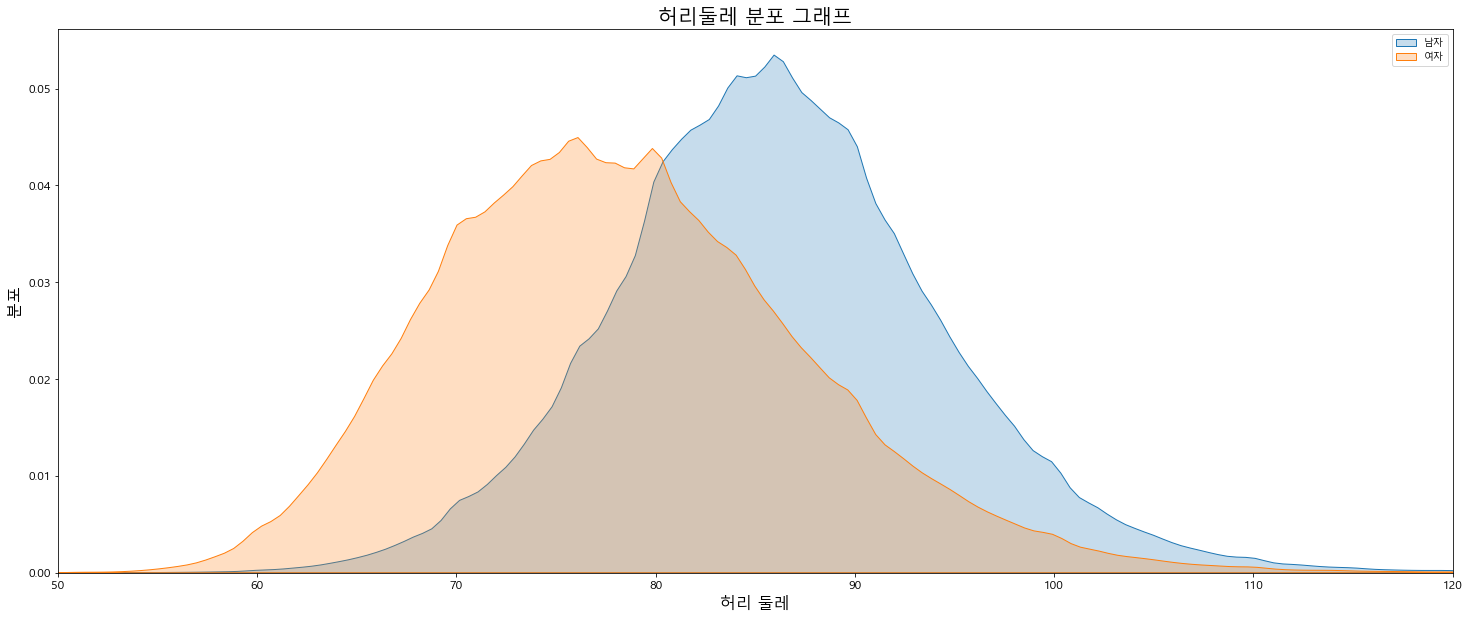

In [23]:
plt.figure(figsize=(25,10))
plt.title('허리둘레 분포 그래프', fontsize=20)
sns.kdeplot(h1['허리둘레'], shade = True, label = '남자')
sns.kdeplot(h2['허리둘레'], shade = True, label = '여자')
plt.xlim(50,120)
plt.xlabel('허리 둘레', fontsize=16)
plt.ylabel('분포', fontsize=16)
plt.legend()
plt.show()

In [24]:
bb = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Data Visualization\법무부_42(결혼이민자) 연도별 결혼이민자 체류현황_20211231.csv',encoding = 'cp949')

In [25]:
bb

,순번,년,결혼이민자 수
0,1,2011,144681
1,2,2012,148498
2,3,2013,150865
3,4,2014,150994
4,5,2015,151608
5,6,2016,152374
6,7,2017,155457
7,8,2018,159206
8,9,2019,166025
9,10,2020,168594


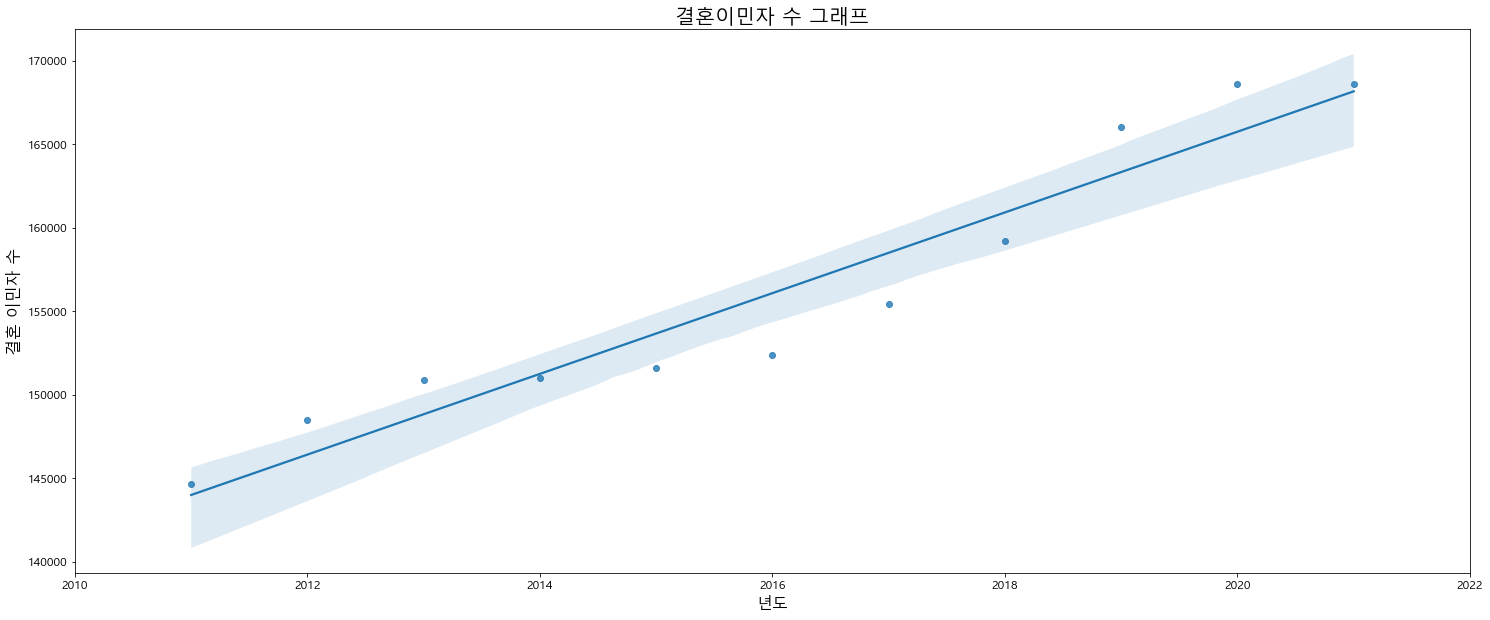

In [26]:
plt.figure(figsize=(25,10))
plt.title('결혼이민자 수 그래프', fontsize=20)
sns.regplot(data = bb,x = '년',y = '결혼이민자 수')
plt.xlim(2010,2022)
plt.xlabel('년도', fontsize=16)
plt.ylabel('결혼 이민자 수', fontsize=16)
plt.show()

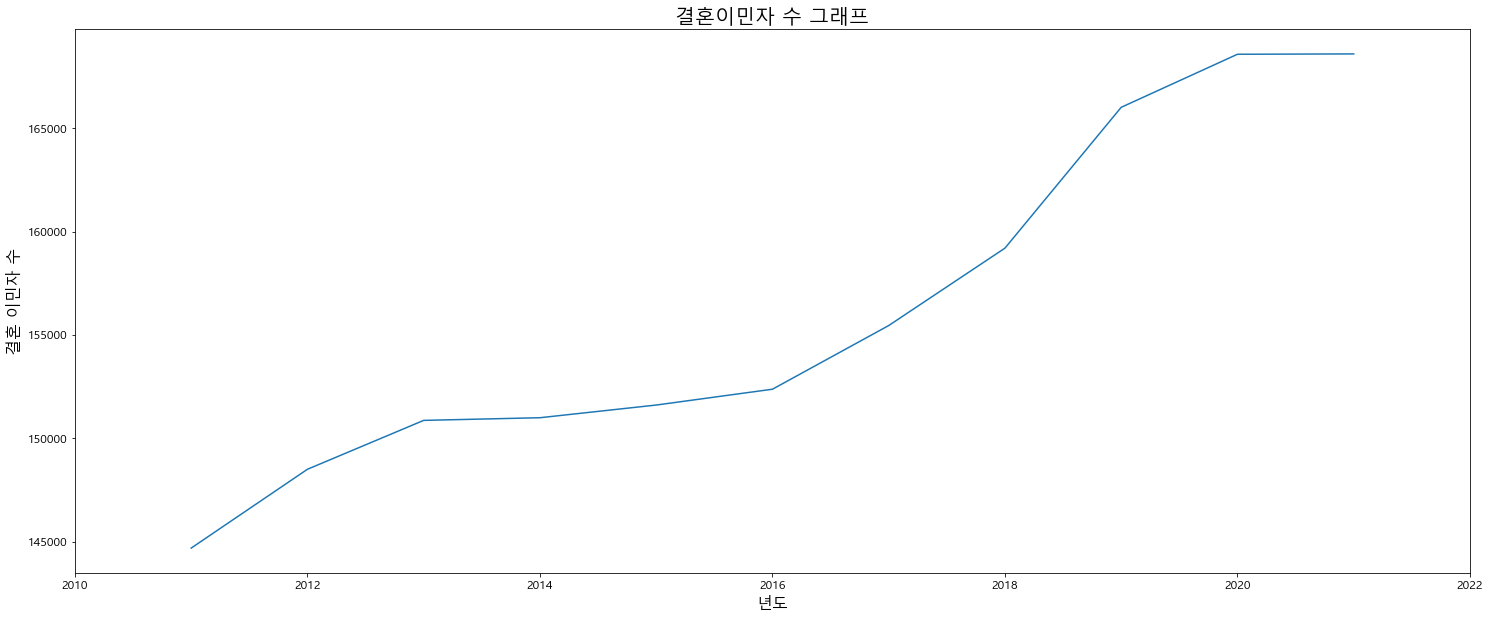

In [52]:
plt.figure(figsize=(25,10))
plt.title('결혼이민자 수 그래프', fontsize=20)
sns.lineplot(data = bb,x = '년',y = '결혼이민자 수')
plt.xlim(2010,2022)
plt.xlabel('년도', fontsize=16)
plt.ylabel('결혼 이민자 수', fontsize=16)
plt.show()

In [34]:
aa['흡연상태'].value_counts()

1.00000    626138
2.00000    189808
3.00000    183711
Name: 흡연상태, dtype: int64

In [45]:
aa['흡연상태'] = aa['흡연상태'].apply(lambda x : '흡연 경험 X' if x == 1.0 else ('금연 중' if x == 2.0 else '흡연 중'))

Text(0.5, 1.0, '흡연 여부에 따른 혈당과 허리둘레 시각화')

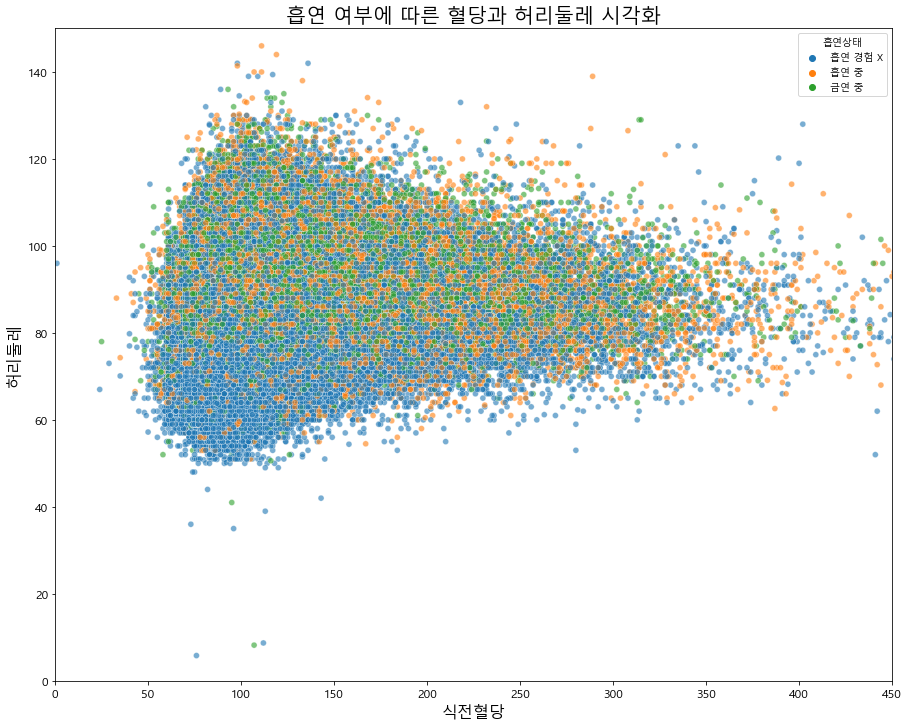

In [50]:
plt.figure(figsize=(15,12))
sns.scatterplot(data = aa, x = aa['식전혈당(공복혈당)'],y = aa['허리둘레'],hue = '흡연상태' ,alpha = 0.6)
plt.xlabel('식전혈당', fontsize=16)
plt.ylabel('허리둘레', fontsize=16)
plt.ylim(0,150)
plt.xlim(0,450)
plt.title('흡연 여부에 따른 혈당과 허리둘레 시각화', fontsize=20)

DataError: No numeric types to aggregate

C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


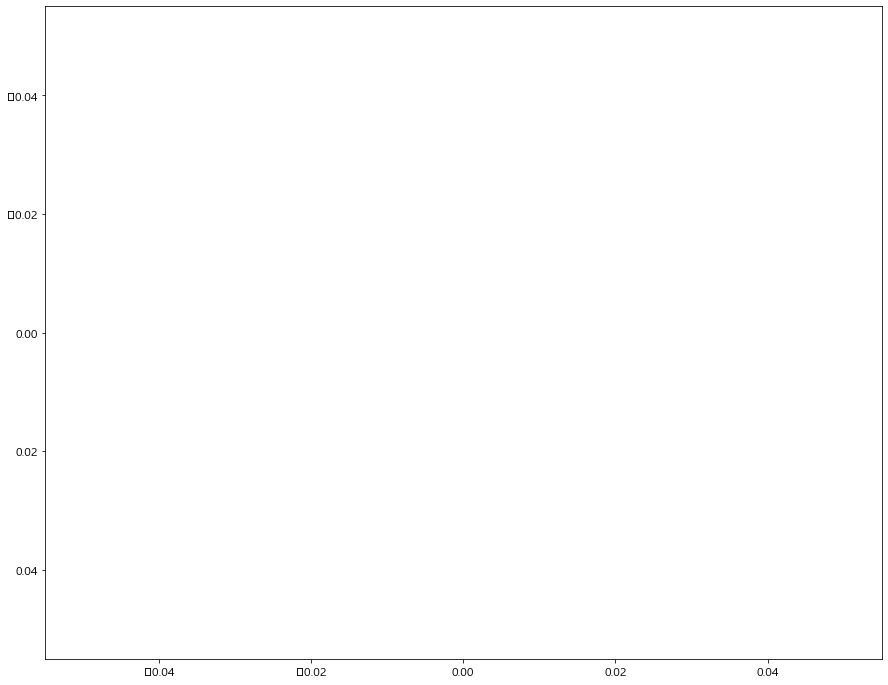

In [51]:
plt.figure(figsize=(15,12))
sns.lineplot(data = aa, x = aa['연령대 코드(5세단위)'],y = aa['허리둘레'].mean,hue = '흡연상태')
plt.xlabel('식전혈당', fontsize=16)
plt.ylabel('허리둘레', fontsize=16)
plt.ylim(0,150)
plt.xlim(0,450)
plt.title('흡연 여부에 따른 혈당과 허리둘레 시각화', fontsize=20)